## CHEME 5660 The Tiger Problem as a Markov Decision Problem

### Introduction
Fill me in

### Example setup

In [1]:
import Pkg; Pkg.activate("."); Pkg.resolve(); Pkg.instantiate();

  Activating project at `~/Desktop/julia_work/CHEME-5660-Markets-Mayhem-Example-Notebooks/jupyter-notebooks/CHEME-5660-Linear-Tiger-MDP`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Markets-Mayhem-Example-Notebooks/jupyter-notebooks/CHEME-5660-Linear-Tiger-MDP/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Markets-Mayhem-Example-Notebooks/jupyter-notebooks/CHEME-5660-Linear-Tiger-MDP/Manifest.toml`


In [16]:
using Distributions
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1664


In [3]:
include("CHEME-5660-Tiger-MDP-CodeLib.jl");

In [4]:
# setup some global constants -
α = 0.75; # probability of moving the direction we are expect

#### States and actions

In [5]:
# setup the states and actions -
safety = 1;
tiger = 50;

states = range(safety,stop=tiger, step=1) |> collect;
actions = [1,2,3]; # a₁ = move left, a₂ = move right, a₃ = listen
γ = 0.95;

#### Rewards

In [6]:
# setup the rewards -
R = Array{Float64,2}(undef,length(states), length(actions));
fill!(R,0.0) # fill R w/zeros

# set the rewards for the ends -
R[safety + 1,1] = 10;
R[tiger-1, 2] = -100;
R[1:length(states), 3] .= -1;

In [7]:
R

50×3 Matrix{Float64}:
  0.0     0.0  -1.0
 10.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  ⋮            
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0     0.0  -1.0
  0.0  -100.0  -1.0
  0.0     0.0  -1.0

#### Transitions

In [8]:
# Setup the transitions
T = Array{Float64,3}(undef, length(states), length(states), length(actions));
fill!(T,0.0);

# We need to put values into the transition array (these are probabilities, so eah row much sum to 1)
T[safety, 1, 1:length(actions)] .= 1.0; # if we are in state 1, we stay in state 1 ∀a ∈ 𝒜
T[tiger, tiger, 1:length(actions)] .= 1.0; # if we are in state 5, we stay in state 5 

##### Left and Right Actions

In [9]:
# left actions -
for s ∈ 2:(tiger - 1)
    T[s,s-1,1] = α;
    T[s,s+1,1] = (1-α);
end

# right actions -
for s ∈ 2:(tiger - 1)
    T[s,s-1,2] = (1-α);
    T[s,s+1,2] = α; 
end

##### Right action

##### Listen action

In [10]:
# listen action (we don't move to a new state)
for s ∈ 2:(tiger-1)
    T[s,s,3] = 1.0;
end

#### Build the MDP problem object 

In [11]:
m = build(MDP; 𝒮 = states, 𝒜 = [1,2,3], T = T, R = R, γ = γ);

In [12]:
# build a always right policy -
always_move_right(s) = 2;
always_move_left(s) = 1;

In [81]:
U = iterative_policy_evaluation(m, always_move_left, 20*length(states))[2:tiger-1]

48-element Vector{Float64}:
 12.751516896174223
 11.58533429968094
 10.525804257502337
  9.563172922019657
  8.688578478102075
  7.89396956279187
  7.172031145870071
  6.51611718897206
  5.92018946332478
  5.37876196287237
  4.886850401067219
  4.439926326402764
  4.033875434283668
  ⋮
  0.4036859795627285
  0.36676693003498484
  0.33322387198543507
  0.3027470919389825
  0.275052981681516
  0.24987654178943552
  0.22695280985833852
  0.20596115298259252
  0.18634642508853191
  0.16673306774077784
  0.1429946941692584
  0.10188371959559661

In [74]:
(a,b) = findmax(U)

(12.751516896174223, 1)

In [20]:
# build a rectangle function for plotting -
rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])

rectangle (generic function with 1 method)

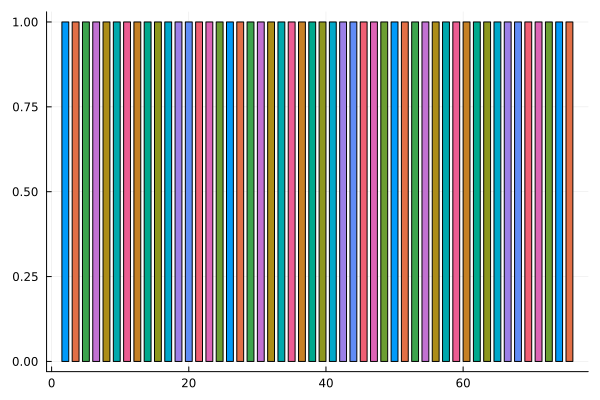

In [73]:
# visualize the policy values -
width = 1.0;
height = 1.0;
y = 0.0;
x = 0.0;



for (i,s) ∈ enumerate(states)
        
    x = x + (width + 0.5)
    if (i == 1)
        plot(rectangle(width, height, x, y), label="")
    else
        plot!(rectangle(width, height, x, y), label="")
    end
    
end

current()